# Đề tài: Huấn luyện, lựa chọn và kiểm thử mô hình dự đoán giá xe hơi đã qua sử dụng tại Việt Nam 

**Mục tiêu của bài toán**:  
Mục tiêu của bài toán này là huấn luyện, lựa chọn và kiểm thử mô hình dự đoán giá xe hơi đã qua sử dụng tại Việt Nam dựa trên dữ liệu đã phân tích từ bài thi giữa kỳ.

Trong đề tài này, biến mục tiêu \( Y \) được xác định là biến số thực **Giá xe**. Dựa trên những gì đã phân tích, ta sẽ xây dựng mô hình hồi quy để dự đoán giá xe đã qua sử dụng dựa trên các đặc trưng:

    Hãng: Ảnh hưởng mạnh đến giá, phản ánh tầm quan trọng của thương hiệu.

    Tuổi xe: Tác động tiêu cực đến giá, xe càng cũ giá càng thấp.

    Dung tích: Xe có động cơ lớn thường có giá cao hơn.

    Dẫn động: Loại dẫn động ảnh hưởng đến giá trị xe.

    Kiểu dáng: Các kiểu dáng phổ biến hoặc cao cấp có xu hướng làm tăng giá.

    Số Km đã đi: Xe đi nhiều thường có giá thấp hơn.

    Tên xe: Tên dòng xe có mối quan hệ rất mạnh với giá.




- Import các thư viện cần thiết:
  - **pandas**: xử lý dữ liệu dạng bảng.
  - **numpy**: tính toán số học.
  - **matplotlib.pyplot**: vẽ biểu đồ.
  - **seaborn**: trực quan hóa dữ liệu thống kê.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Làm sạch dữ liệu và trực quan đơn biến

- Đọc dữ liệu từ file CSV qua đường dẫn được chỉ định.
- Sử dụng `pd.read_csv()` để nạp dữ liệu vào DataFrame `df`.

In [ ]:
file_path = '/content/rawdata.csv'
df=pd.read_csv(file_path)

- Loại bỏ các dòng trùng lặp trong DataFrame và cập nhật trực tiếp (`inplace=True`).

In [ ]:
df.drop_duplicates(inplace=True)


- **Chuyển đổi dữ liệu trong cột 'Price':**
  - Thay thế các ký tự không cần thiết như khoảng trắng, dấu phẩy, từ "Tỷ" và "Triệu" với giá trị tương ứng (tỷ và triệu chuyển thành số).
  - Áp dụng phép tính vào các giá trị trong cột **Price** để chuyển đổi chúng thành giá trị số thực.
  - Đánh giá biểu thức chuỗi (ví dụ: "2+3*1000000") thành giá trị thực tế.


In [ ]:
df['Price'] = (
    df['Price']
    .replace({' ': '', ',': '', 'Tỷ': '*1000000000+', 'Triệu': '*1000000'}, regex=True)
    .replace(r'\+$', '', regex=True)
    .apply(lambda x: pd.eval(x) if pd.notna(x) else None)
)



- Tìm vị trí dấu gạch ngang (`-`) trong chuỗi và cắt bỏ phần sau dấu gạch ngang, chỉ giữ lại phần trước dấu gạch ngang. Tức là bỏ năm sản xuất trong tên.
- Áp dụng hàm `normalName` cho mỗi giá trị trong cột **Name** để xử lý tên.


In [ ]:
def normalName(str):
  pos=str.find('-')
  str=str[:pos-1]
  return str
df['Name']=df['Name'].apply(normalName)



- Tìm vị trí dấu gạch ngang (`-`) trong chuỗi và cắt bỏ phần sau dấu gạch ngang, chỉ giữ lại phần trước dấu gạch ngang. Tức là chỉ giữ lại phần cần thiết (AWD, 4WD, ..)
- Áp dụng hàm `normalDanDong` cho mỗi giá trị trong cột **Dẫn động** để xử lý dữ liệu.


In [ ]:
def normalDanDong(str):
  pos=str.find('-')
  str=str[:pos-1]
  return str
df['Dẫn động']=df['Dẫn động'].apply(normalDanDong)


In [ ]:
df['Năm sản xuất'] = pd.to_numeric(df['Năm sản xuất'], errors='coerce')



- Loại bỏ ký tự " Km" và dấu phẩy trong các giá trị trong cột **Số Km đã đi**.
- Chuyển đổi cột **Số Km đã đi** thành kiểu số, thay thế các giá trị không hợp lệ thành NaN.


In [ ]:
df['Số Km đã đi'] = df['Số Km đã đi'].replace({' Km': '', ',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')


- Vẽ biểu đồ hộp (boxplot) cho cột **Price**, chia giá trị của cột **Price** cho 1 triệu để hiển thị giá trị theo đơn vị triệu VND

Biểu đồ  giúp quan sát sự phân phối của **Giá xe** dưới dạng biểu đồ hộp (boxplot), với giá trị được chuyển đổi sang triệu VND.

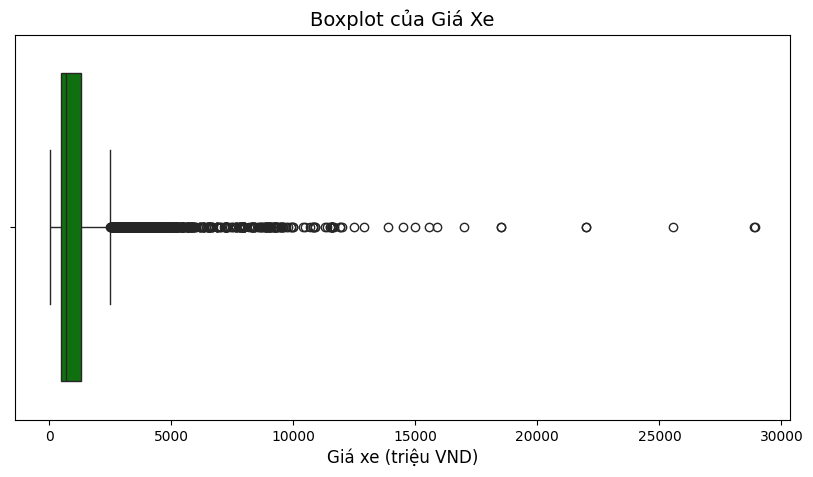

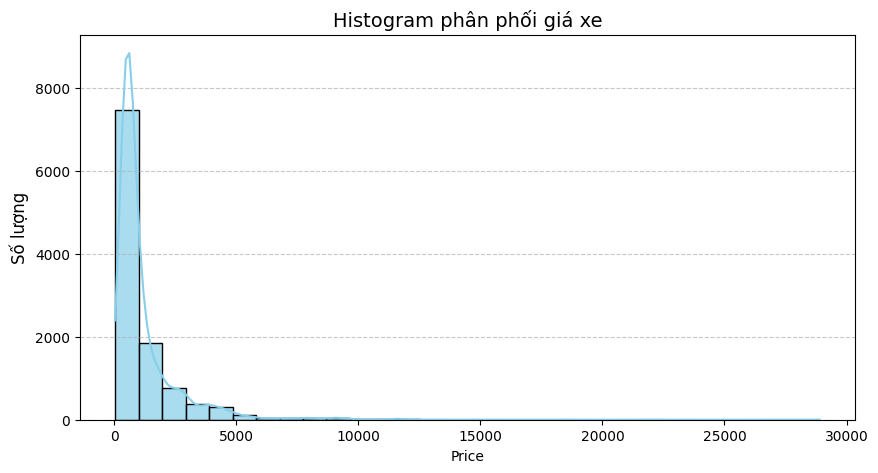

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Price'] / 1e6, color='green')

plt.title("Boxplot của Giá Xe", fontsize=14)
plt.xlabel("Giá xe (triệu VND)", fontsize=12)
plt.show()
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'] / 1e6, bins=30, color='skyblue', kde=True, edgecolor='black', alpha=0.7)
plt.ylabel('Số lượng', fontsize=12)
plt.title('Histogram phân phối giá xe', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
df_copy = df.copy()

df_copy['Price'] = np.log(df_copy['Price'])

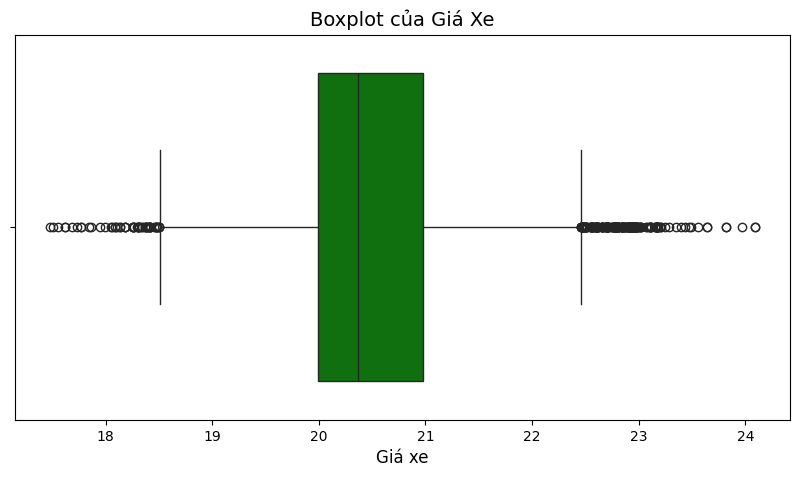

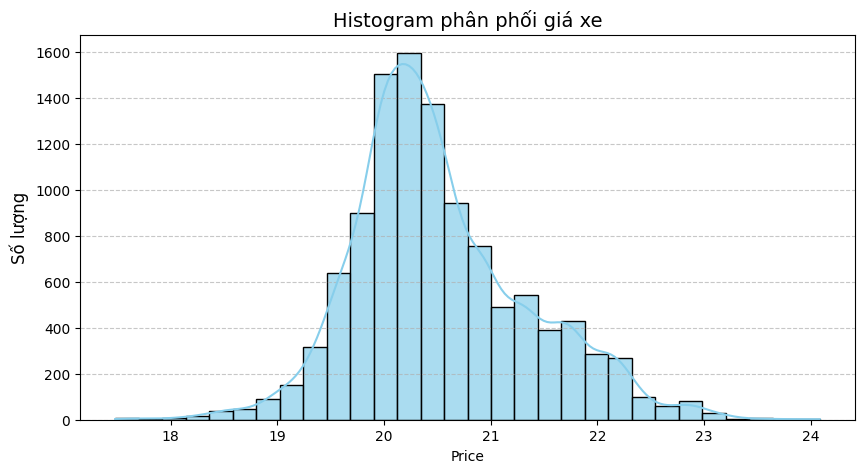

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_copy['Price'], color='green')

plt.title("Boxplot của Giá Xe", fontsize=14)
plt.xlabel("Giá xe", fontsize=12)
plt.show()
plt.figure(figsize=(10, 5))
sns.histplot(df_copy['Price'], bins=30, color='skyblue', kde=True, edgecolor='black', alpha=0.7)
plt.ylabel('Số lượng', fontsize=12)
plt.title('Histogram phân phối giá xe', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



1. Sử dụng biểu thức chính quy (`regex`) để tách cột **Động cơ** thành hai cột:  
   - **Nhiên liệu**: Tách phần chứa loại nhiên liệu (chữ cái).
   - **Dung tích**: Tách phần chứa dung tích động cơ (số).
   
2. Loại bỏ ký tự "l" trong cột **Dung tích** để chỉ giữ lại giá trị số.


In [ ]:
df[["Nhiên liệu", "Dung tích"]] = df["Động cơ"].str.extract(r"(\D+)\s?([\d\.]+)?")
df["Dung tích"] = df["Dung tích"].str.replace("l", "", regex=True)
df["Dung tích"] = pd.to_numeric(df['Dung tích'], errors='coerce')


Thay thế tất cả giá trị thiếu (NaN) trong cột **Dung tích** bằng 0.


In [ ]:
df["Dung tích"] = df["Dung tích"].fillna(0)


1. Hàm tách chuỗi tên xe bằng cách chia theo khoảng trắng và trả về từ đầu tiên, giả sử đây là **Hãng** xe.

2. Áp dụng hàm cho cột **Name** để tạo cột mới **Hãng** chứa tên hãng xe.

In [ ]:
def getBrand(str):
  words=str.split(' ')
  return words[0]
df['Hãng']=df['Name'].apply(getBrand)


- Chuyển cột **Năm sản xuất** thành kiểu dữ liệu datetime, chỉ sử dụng năm để tạo cột **Manufacture_Date**.

- Tính tuổi xe bằng cách lấy hiệu giữa ngày đặng bài và ngày sản xuất, sau đó chia cho 365 để tính tuổi tính theo năm.


In [ ]:
from datetime import datetime
import pandas as pd

df["Manufacture_Date"] = pd.to_datetime(df["Năm sản xuất"].astype(str), format="%Y")

df["Date Posted"] = pd.to_datetime(df["Date Posted"], format="%d/%m/%Y")

df["Tuổi xe"] = (df["Date Posted"] - df["Manufacture_Date"]).dt.days / 365

Đổi tên các cột trong DataFrame:
  - Cột **Price** thành **Giá**.
  - Cột **Name** thành **Tên xe**.
  - Cột **Location** thành **Địa chỉ**.

In [ ]:
df = df.rename(columns={'Price':'Giá', 'Name':'Tên xe', 'Location':'Địa chỉ',})



---



# Xây dựng và kiểm thử mô hình

In [ ]:
!pip install xgboost
!pip install category_encoders

In [ ]:
import sklearn as sk

In [ ]:
Y = df['Giá'].copy()

X = df[['Hãng', 'Tuổi xe', 'Dung tích', 'Dẫn động', 'Kiểu dáng',
'Số Km đã đi', 'Tên xe', 'Năm sản xuất']].copy()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=43)

In [ ]:
Q1 = X_train['Số Km đã đi'].quantile(0.25)
Q3 = X_train['Số Km đã đi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_mask = (X_train['Số Km đã đi'] >= lower_bound) & (X_train['Số Km đã đi'] <= upper_bound)
X_train = X_train[train_mask]
y_train = y_train[train_mask]

In [ ]:
temp_df = X_train[["Năm sản xuất", "Số Km đã đi"]].copy()
temp_df.loc[temp_df["Số Km đã đi"] == 0, "Số Km đã đi"] = np.nan
temp_df_sorted = temp_df.sort_values(by="Năm sản xuất")

known_x = temp_df_sorted["Năm sản xuất"][temp_df_sorted["Số Km đã đi"].notna()]
known_y = temp_df_sorted["Số Km đã đi"][temp_df_sorted["Số Km đã đi"].notna()]

from scipy.interpolate import UnivariateSpline
spline = UnivariateSpline(known_x, known_y, k=2, ext=3)
missing_mask = temp_df_sorted["Số Km đã đi"].isna()
predicted_values = spline(temp_df_sorted.loc[missing_mask, "Năm sản xuất"])

# Apply predictions
temp_df_sorted.loc[missing_mask, "Số Km đã đi"] = predicted_values

# If any values are still missing, fall back to linear interpolation, then fill with median
if temp_df_sorted["Số Km đã đi"].isna().sum() > 0:
    temp_df_sorted["Số Km đã đi"] = temp_df_sorted["Số Km đã đi"].interpolate(method='linear')
    if temp_df_sorted["Số Km đã đi"].isna().sum() > 0:
        median_mileage = temp_df_sorted["Số Km đã đi"].median()
        temp_df_sorted["Số Km đã đi"] = temp_df_sorted["Số Km đã đi"].fillna(median_mileage)

# Apply final constraint: minimum of 500 km
temp_df_sorted["Số Km đã đi"] = temp_df_sorted["Số Km đã đi"].apply(lambda x: max(x, 500))

# Copy results back to X_train without changing its row order
X_train.loc[temp_df_sorted.index, "Số Km đã đi"] = temp_df_sorted["Số Km đã đi"].round().astype(int)

X_train.drop('Năm sản xuất', axis=1, inplace=True)
X_test.drop('Năm sản xuất', axis=1, inplace=True)

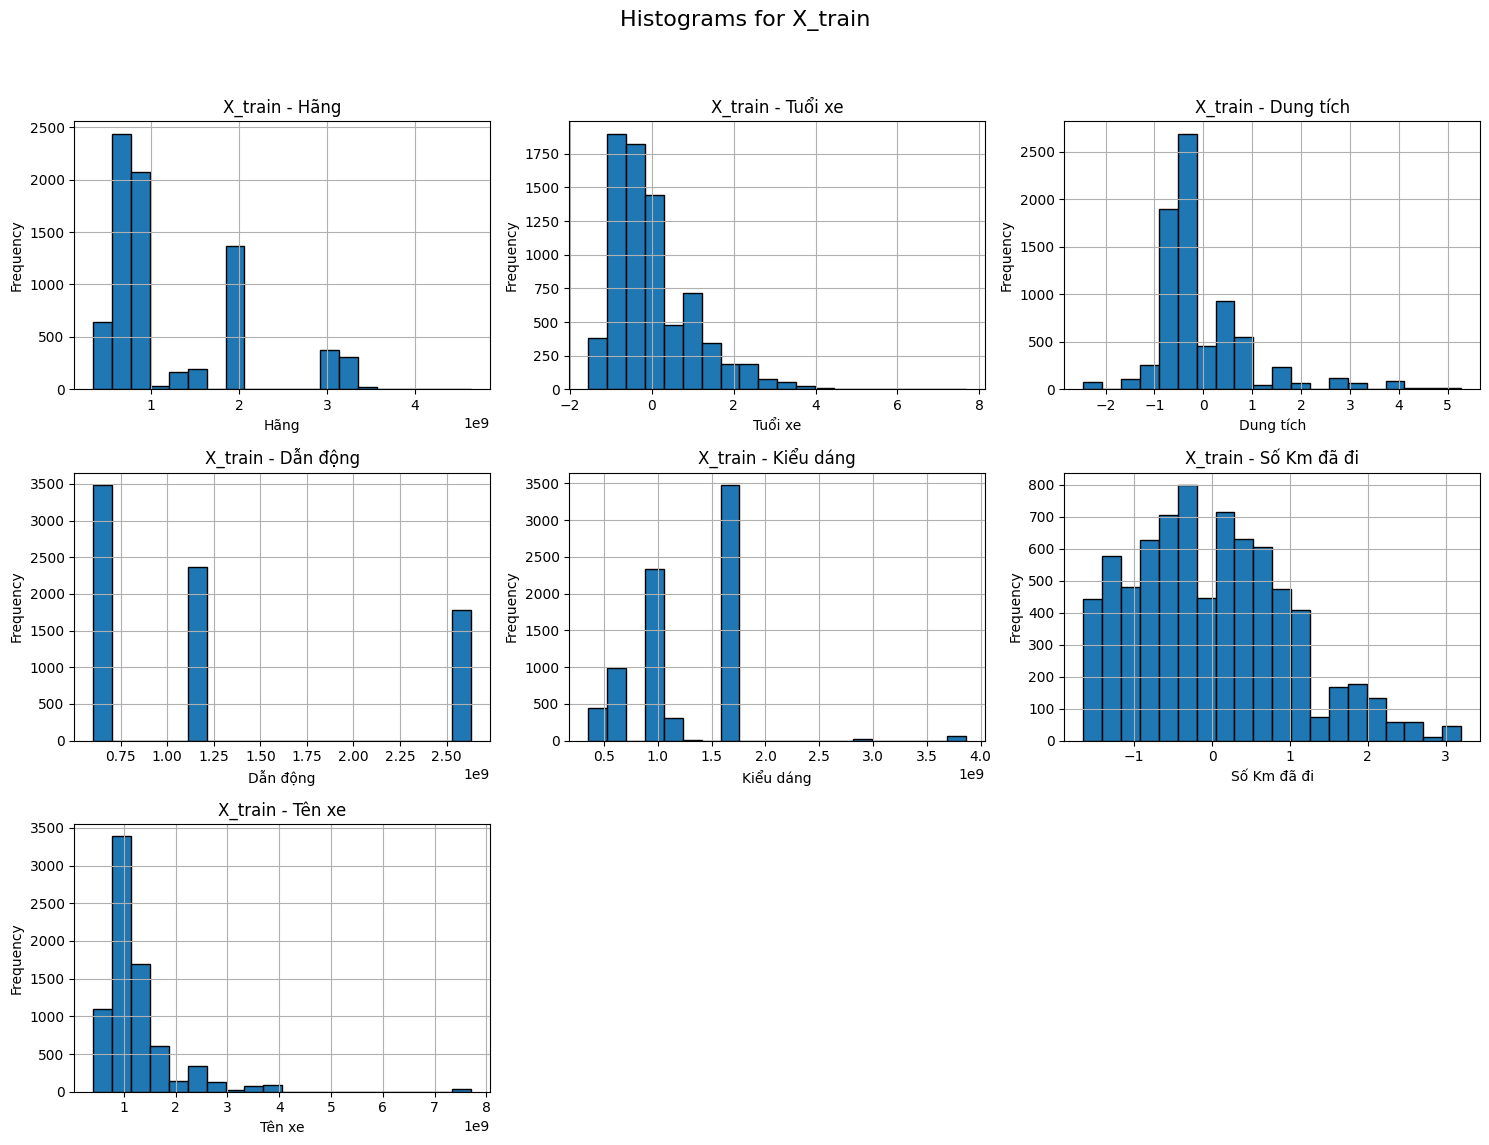

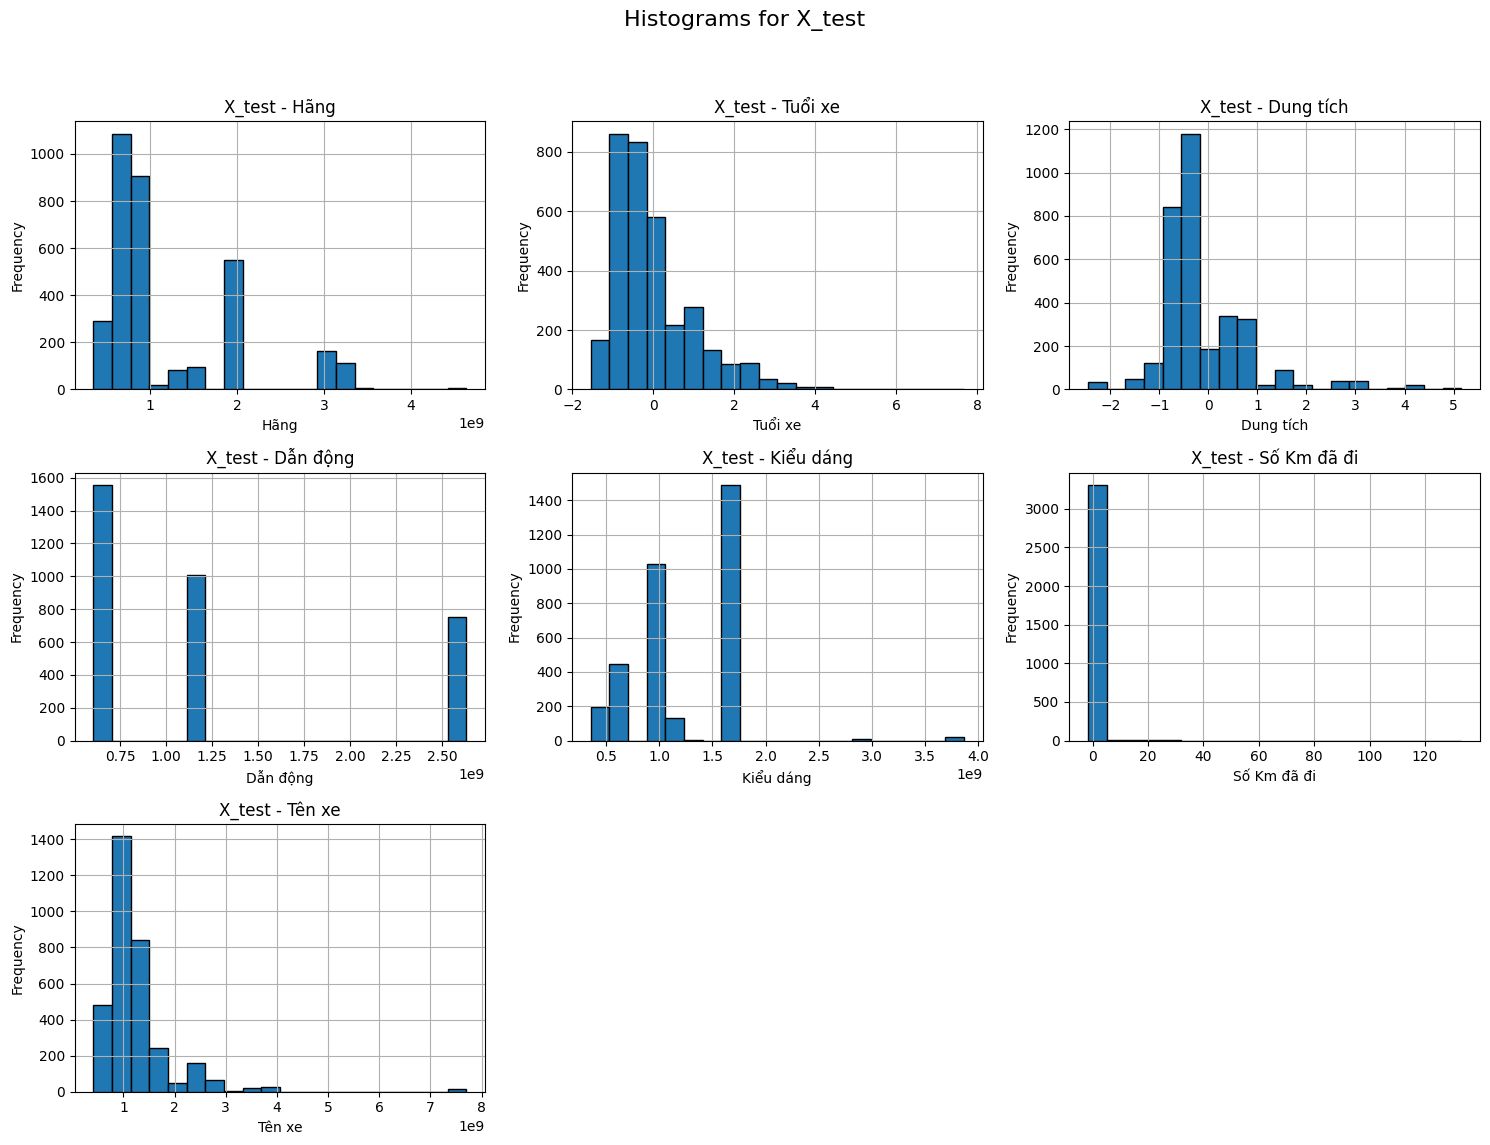

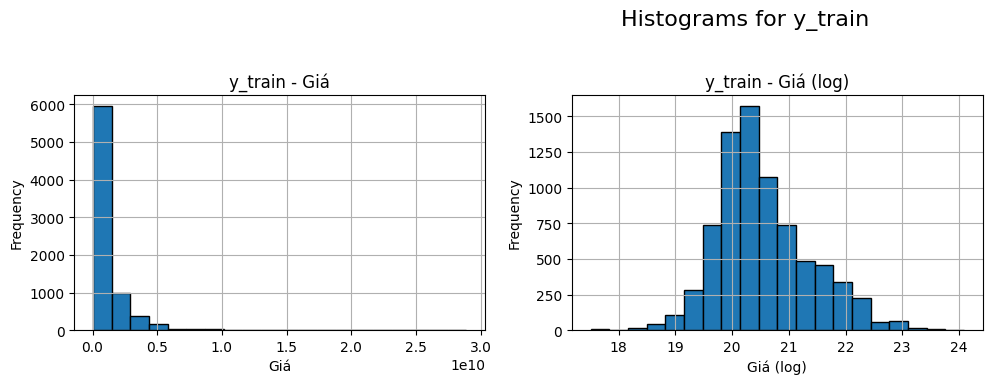

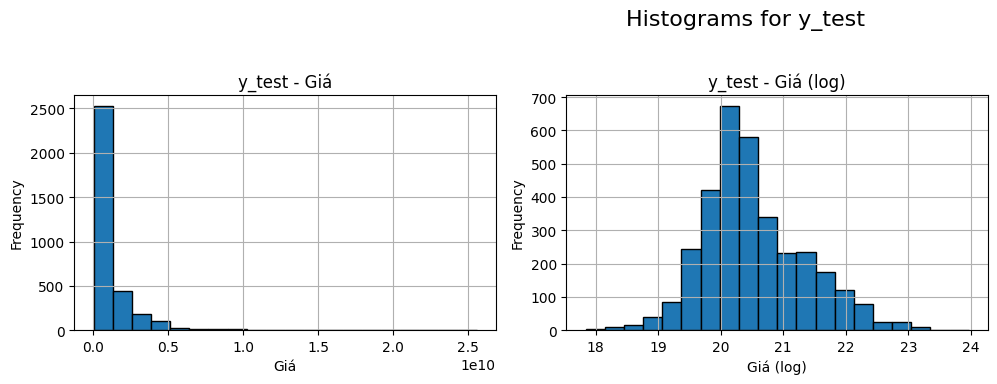

In [ ]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
import math

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

y_train_copy = y_train_copy.to_frame()
y_test_copy = y_test_copy.to_frame()

y_train_copy = y_train_copy.rename(columns= {0: 'Giá'})
y_train_copy.index.name = 'index'

y_train_copy['Giá (log)'] = np.log(y_train_copy)
y_test_copy['Giá (log)'] = np.log(y_test_copy)

numerical_cols = X_train_copy.select_dtypes(include=["number"]).columns
categorical_cols = X_train_copy.select_dtypes(exclude=["number"]).columns

ss = StandardScaler()
ss.fit(X_train_copy[numerical_cols])
X_train_copy[numerical_cols] = ss.transform(X_train_copy[numerical_cols])
X_test_copy[numerical_cols] = ss.transform(X_test_copy[numerical_cols])

encoder = ce.TargetEncoder()
encoder.fit(X_train_copy[categorical_cols], y_train_copy['Giá'])
X_train_copy[categorical_cols] = encoder.transform(X_train_copy[categorical_cols])
X_test_copy[categorical_cols] = encoder.transform(X_test_copy[categorical_cols])

numeric_dfs = {
    'X_train': X_train_copy,
    'X_test': X_test_copy,
    'y_train': y_train_copy,
    'y_test': y_test_copy
}

for label, df in numeric_dfs.items():
    num_cols = df.shape[1]
    cols = 3  # Number of plots per row
    rows = math.ceil(num_cols / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        axes[i].hist(df[col].dropna(), bins=20, edgecolor='black')
        axes[i].set_title(f'{label} - {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True)

    # Hide any extra subplots
    for j in range(num_cols, len(axes)):
        axes[j].set_visible(False)

    fig.suptitle(f'Histograms for {label}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

numerical_cols = X_train.select_dtypes(include=["number"]).columns
categorical_cols = X_train.select_dtypes(exclude=["number"]).columns

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('target', ce.TargetEncoder(), categorical_cols)
  ]
)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.compose import TransformedTargetRegressor
import warnings

warnings.filterwarnings('ignore')


r2_train_scores = []
r2_test_scores = []
r2_train_log_scores = []
r2_test_log_scores = []
cv_mean = []
mae_scores = []
mape_scores = []

def car_price_prediction_model(model):
    pipeline = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('model', TransformedTargetRegressor(regressor=model, func=np.log1p, inverse_func=np.expm1))
    ])
    pipeline.fit(X_train, y_train)

    #R2 score of training set
    y_train_pred = pipeline.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    r2_train_scores.append(r2_train)

    #R2 score of test set
    y_test_pred = pipeline.predict(X_test)
    r2_test = r2_score(y_test, y_test_pred)
    r2_test_scores.append(r2_test)

    r2_train_log = r2_score(np.log1p(y_train), np.log1p(y_train_pred))
    r2_train_log_scores.append(r2_train_log)

    r2_test_log = r2_score(np.log1p(y_test), np.log1p(y_test_pred))
    r2_test_log_scores.append(r2_test_log)

    # MAE: Mean Absolute Error (i.e., MSE)
    mae = mean_absolute_error(y_test, y_test_pred)
    mae_scores.append(mae)

    # MAPE
    mape = np.mean(np.abs((y_test - y_test_pred) / (y_test + 1e-10))) * 100
    mape_scores.append(mape)

    # CV score of training set
    cv_training = cross_val_score(pipeline, X_train, y_train, cv=5)
    cv_mean_training = cv_training.mean()
    cv_mean.append( cv_mean_training)



    # Printing each score
    print("Training set R2 scores: ", r2_train)
    print("Test set R2 scores: ", r2_test)
    print("Training set R2 scores (log): ", r2_train_log)
    print("Test set R2 scores (log): ", r2_test_log)
    print("MAE scores: ", mae)
    print("MAPE scores: ", mape)
    print("Training cross validation score: ", cv_training)
    print("Training cross validation mean score: ", cv_mean_training)
    print("---------------------")
    print("Best model's hyperparameters: ", pipeline['model'].regressor_.best_params_)
    print("---------------------")

    fig, ax = plt.subplots(1,3,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_train_pred),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_pred')

    # Y_test vs Y_train scatter plot
    coeffs = np.polyfit(y_test, y_test_pred, deg=1)
    reg_line = np.poly1d(coeffs)
    x_vals = np.linspace(min(y_test), max(y_test), 100)
    ax[1].plot(x_vals, reg_line(x_vals), color='red', label='Fit')
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_test_pred)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')

    log_coeffs = np.polyfit(np.log1p(y_test), np.log1p(y_test_pred), deg=1)
    log_reg_line = np.poly1d(log_coeffs)
    log_x_vals = np.linspace(min(np.log1p(y_test)), max(np.log1p(y_test)), 100)
    ax[2].plot(log_x_vals, log_reg_line(log_x_vals), color='red', label='Fit')
    ax[2].set_title('log(y_test) vs log(y_pred_test)')
    ax[2].scatter(x = np.log1p(y_test), y = np.log1p(y_test_pred))
    ax[2].set_xlabel('log(y_test)')
    ax[2].set_ylabel('log(y_pred_test)')

    plt.show()


Training set R2 scores:  0.6746488005034588
Test set R2 scores:  0.5095876087990507
Training set R2 scores (log):  0.8665585097007773
Test set R2 scores (log):  0.8565688102371329
MAE scores:  327326107.9033488
MAPE scores:  23.380907172485546
Training cross validation score:  [0.64558722 0.636905   0.63166995 0.62953581 0.71515624]
Training cross validation mean score:  0.6517708435193569
---------------------
Best model's hyperparameters:  {'alpha': np.float64(0.0009198150191250309), 'max_iter': 1000, 'tol': 1e-05}
---------------------


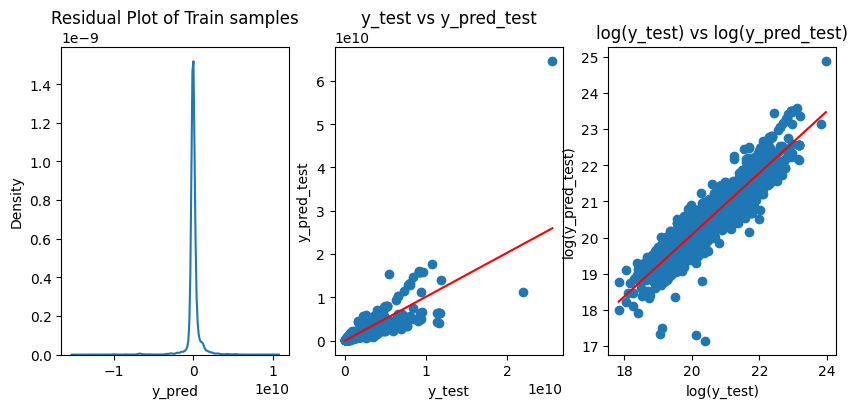

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

ls = Lasso()

# Không gian tìm kiếm siêu tham số
param_distributions = {
    'alpha': loguniform(1e-4, 1e4),
    'tol': [1e-5, 1e-4, 1e-3],
    'max_iter': [1000, 2000, 5000]
}

# Thiết lập RandomizedSearchCV
ls_rs = RandomizedSearchCV(
    estimator=ls,
    param_distributions=param_distributions,
)

car_price_prediction_model(ls_rs)

Training set R2 scores:  0.9952036142349243
Test set R2 scores:  0.8782169222831726
Training set R2 scores (log):  0.9953331945520968
Test set R2 scores (log):  0.9181088995172128
MAE scores:  112923560.0
MAPE scores:  12.400787761384276
Training cross validation score:  [0.9143663  0.96857285 0.62346125 0.82692373 0.88112569]
Training cross validation mean score:  0.8428899645805359
---------------------
Best model's hyperparameters:  {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 900, 'subsample': np.float64(0.7891966895471783)}
---------------------


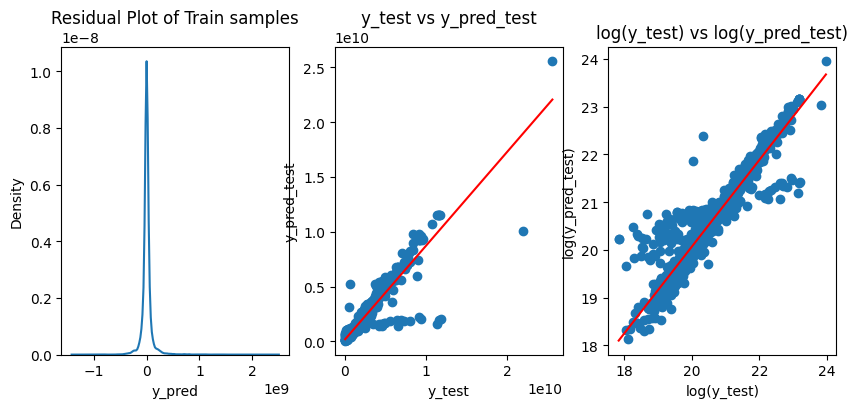

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

xg = XGBRegressor(verbosity= 0)

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
learning_rate=[0.05,0.1,0.15,0.20]
subsample=uniform(0.5,1)

parameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'subsample': subsample
    }

xg_rs = RandomizedSearchCV(estimator=xg, param_distributions=parameter_grid)

car_price_prediction_model(xg_rs)

Training set R2 scores:  0.9577178582432492
Test set R2 scores:  0.8230941439391499
Training set R2 scores (log):  0.9794712502161601
Test set R2 scores (log):  0.8496324430575593
MAE scores:  157199963.26682732
MAPE scores:  20.74841264939698
Training cross validation score:  [0.83859845 0.84742847 0.58863455 0.79526808 0.86802747]
Training cross validation mean score:  0.7875914036271571
---------------------
Best model's hyperparameters:  {'criterion': 'friedman_mse', 'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 3}
---------------------


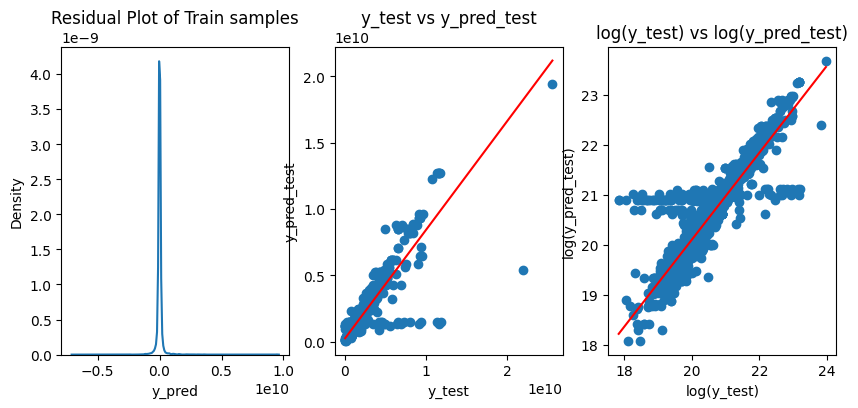

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

dt = DecisionTreeRegressor()

param_dist = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

dt_rs = RandomizedSearchCV(estimator=dt, param_distributions=param_dist)

car_price_prediction_model(dt_rs)


In [ ]:
algo = ["LinearRegression(Lasso)", "ExtremeGradientBoostingRegressor", "DecisionTreeRegressor"]

model_eval = pd.DataFrame({'Model': algo,'R Squared(Train)': r2_train_scores, 'R Squared(Test)': r2_test_scores,
                           'R Squared(Train)(log)': r2_train_log_scores, 'R Squared(Test)(log)': r2_test_log_scores,
                           'Mean Absolute Error': mae_scores, 'MAPE': mape_scores, 'CV score mean(Train)': cv_mean})
display(model_eval)

,Model,R Squared(Train),R Squared(Test),R Squared(Train)(log),R Squared(Test)(log),Mean Absolute Error,MAPE,CV score mean(Train)
0,LinearRegression(Lasso),0.674649,0.509588,0.866559,0.856569,3.273261e+08,23.380907,0.651771
1,ExtremeGradientBoostingRegressor,0.995204,0.878217,0.995333,0.918109,1.129236e+08,12.400788,0.842890
2,DecisionTreeRegressor,0.957718,0.823094,0.979471,0.849632,1.572000e+08,20.748413,0.787591




---

# Kết luận


XGBoost tốt nhất, tất cả chỉ số đều tốt hơn 2 mô hình còn lại.

Lasso tệ trên giá gốc (R² Test = 0.506) nhưng tốt trên log giá (R² Test log = 0.856)

Vì:

Dữ liệu trong tập test nhiều giá trị ngoại lệ, Lasso nhạy cảm với giá trị ngoại lệ, còn XGBoost và  DecisionTree mạnh mẽ với những giá trị ngoại lệ hơn

XGBoost tốt hơn DecisionTree vì nó xây dựng các cây quyết định tuần tự, mỗi cây sửa lỗi của cây trước bằng cách tối ưu hóa hàm mất mát, trong khi DecisionTree chỉ dùng 1 cây

Log giá giảm độ lệch, làm phân phối gần chuẩn, giúp tất cả mô hình đạt R² Test log cao

Lasso áp dụng phạt L1 (|w|) để làm một số trọng số đặc trưng về 0, giúp giảm overfitting nhưng cũng làm mô hình đơn giản hơn. Điều này khiến Lasso nhạy cảm với các mẫu ngoại lệ hoặc nhiễu

Lasso nhạy cảm với phân phối lệch của giá gốc. XGBoost và Decision Tree, là các mô hình phi tuyến, không phụ thuộc vào phân phối chuẩn, nên ít bị ảnh hưởng bởi độ lệch